In [37]:
#load libraries
import numpy as np 
import pandas as pd 
import os 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.model_selection import GridSearchCV



Tout d'abord nous créeons un dictionnaire qui contient le nom (ou numéro, ici c'est équivalent) des séries temporelles avec pour clef le numéro de la classe à laquelle elles appartiennent

In [18]:
elements = os.listdir("../classes")
Mat = {}
for element in elements :
    if element[0] != "m" :
        new_mat = []
        dirs = os.listdir("../classes/"+element)
        for dir in dirs:
            if dir[-3 :] == "png" and dir[0]!="m":
                new_mat.append(int(dir.replace(".png","")))
        Mat[int(element.replace("class_",""))] = new_mat

In [19]:
#on crée la colonne cible (celle qui contient les classes à prédire)
y=np.zeros((1,len(df)))
for i in range(len(df)):
    for key in Mat: 
        if(i in Mat[key]): 
            y[0,i]=key
#on affiche les 4 premières valeurs
print(y[0,:4])

[ 0. 12. 12. 12.]


In [20]:
# on test que toute les classes que l'on attend soient présent dans le vecteurs résultats

In [21]:
for i in range(19):
    try :
        assert i in y
    except Exception as e :
        print("Error, i is not in y")
print("Test succesful")

Test succesful


In [22]:
#on télécharge le tableau de features précédemment crée
df=pd.read_csv("features.csv",index_col=0)

In [23]:
#on peut regarder à quoi il ressemble 
print(df.describe())

         x__length     x__mean  x__maximum  x__minimum  x__abs_energy  \
count   796.000000  796.000000  796.000000  796.000000     796.000000   
mean    682.790201    5.365067    5.619167    4.946878   19699.215620   
std     730.748619    1.423111    1.395894    1.473739   22053.232004   
min      29.000000    0.318046    0.424157    0.257953      10.468442   
25%     153.750000    5.430233    5.793165    4.886084    4401.351410   
50%     355.000000    5.829756    6.147063    5.413310    9746.059781   
75%     943.000000    6.095680    6.232665    5.778159   26583.729020   
max    2826.000000    6.231967    6.295188    6.231472  109752.441906   

       x__count_below_mean  \
count           796.000000   
mean            310.791457   
std             361.444313   
min               1.000000   
25%              56.000000   
50%             149.000000   
75%             408.000000   
max            1652.000000   

       x__augmented_dickey_fuller__attr_"pvalue"__autolag_"AIC"  \
coun

In [61]:
#on remplace les valeurs infinie par des NAN et on remplace les NAN par les valeurs médianes
df= df.replace([np.inf, -np.inf], np.nan)
df.fillna(df.median(), inplace=True)


0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.000000000000001
8.0
9.0
10.0
11.0
12.0
13.0
14.000000000000002
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.000000000000004
28.999999999999996
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.00000000000001
56.00000000000001
56.99999999999999
57.99999999999999
59.0
60.0
61.0
62.0
63.0
64.0
65.0
66.0
67.0
68.0
69.0
70.0
71.0
72.0
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
88.0
89.0
90.0
91.0
92.0
93.0
94.0
95.0
96.0
97.0
98.0
99.0
Min. model accuracy 53.97489539748954
Max. model accuracy 68.20083682008368


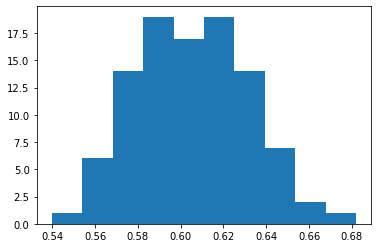

In [34]:
# on split les données en données de test et données d'entrainement 
import sys

model_accuracies = []
nb_forest = 100
for i in range(nb_forest):
    print(i/nb_forest*100)
    sys.stdout.flush()
    X_train, X_test, y_train, y_test = train_test_split(df, y.reshape(-1,1), test_size=0.30)
    clf = RandomForestClassifier(min_samples_split=10, random_state=0)
    clf.fit(X_train, y_train.reshape(-1,))
    score = clf.score(X_test,y_test)
    model_accuracies.append(score)
    
print("Min. model accuracy",min(model_accuracies)*100)
print("Max. model accuracy",max(model_accuracies)*100)
plt.hist(model_accuracies) 
plt.show()

In [35]:
#create cross validation object
cross_validation = StratifiedKFold(n_splits=10)

In [56]:
#Grid Search
parameter_grid = {'n_estimators': [10, 25, 50, 100],
                  'criterion': ['gini', 'entropy'],
                  'min_samples_split': [2,5,10,8],
                  'max_features': [1, 2, 3, 4,5]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(clf,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(df, y.reshape(-1,))
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

best = grid_search.best_estimator_

/home/gregoryscafarto/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Best score: 0.5790506329113925
Best parameters: {'criterion': 'gini', 'max_features': 1, 'min_samples_split': 10, 'n_estimators': 100}


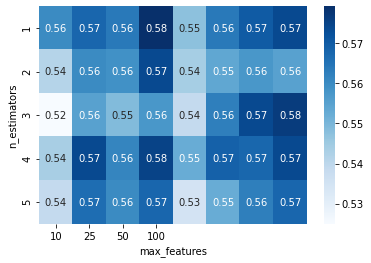

In [51]:
grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (5, 8)
sn.heatmap(grid_visualization, cmap='Blues', annot=True)
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['min_samples_split'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_features'])
plt.xlabel('max_features')
plt.ylabel('min_samples_split') ;

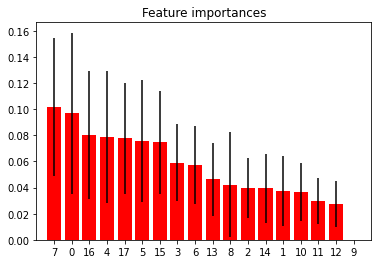

In [57]:
#analyse des features les plus importantes 
importances = clf.feature_importances_

std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [58]:
#on afiiche les features dans l'ordre d'importance 
print(X_train.columns[indices])

Index(['x__number_cwt_peaks__n_15', 'x__length', 'x__sum_values',
       'x__abs_energy', 'x__variance', 'x__count_below_mean',
       'x__standard_deviation', 'x__minimum',
       'x__augmented_dickey_fuller__attr_"pvalue"__autolag_"AIC"',
       'x__mean_second_derivative_central', 'x__number_peaks__n_30',
       'x__maximum', 'x__median', 'x__mean', 'x__sample_entropy',
       'x__first_location_of_minimum', 'x__first_location_of_maximum',
       'x__range_count__max_9000000000.0__min_6000000000.0'],
      dtype='object')


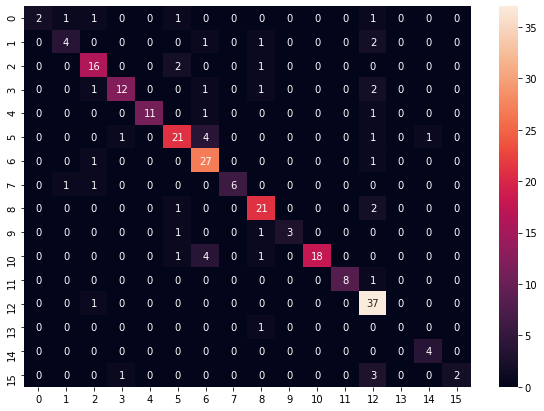

In [60]:
# matrice de confusion pour analyser ce qui a été mal classé
mt = confusion_matrix(y_test, best.predict(X_test))
plt.figure(figsize = (10,7))
sn.heatmap(mt, annot=True)
plt.show()